#### CRP Inflammation marker Data Cleaning and Analysis

In [4]:
import pandas as pd

# Define the file paths
file_path_crp_d = '../data/raw_data/2005-2006/CRP_D.csv'
file_path_l11_c = '../data/raw_data/2003-2004a/L11_C.csv'

# Load the CSV files into DataFrames
try:
    df_crp_d = pd.read_csv(file_path_crp_d)
    df_l11_c = pd.read_csv(file_path_l11_c)

    print("--- Successfully loaded CRP_D.csv (NHANES 2005-2006 Laboratory Data) ---")
    print(df_crp_d.head())
    print("\nColumns in CRP_D.csv:", df_crp_d.columns.tolist())
    print("\nData types in CRP_D.csv:")
    print(df_crp_d.info())


    print("\n--- Successfully loaded L40_C.csv (NHANES 2003-2004 Laboratory Data) ---")
    print(df_l40_c.head())
    print("\nColumns in L40_C.csv:", df_l40_c.columns.tolist())
    print("\nData types in L40_C.csv:")
    print(df_l40_c.info())

except FileNotFoundError:
    print("Error: One or both files were not found at the specified paths. Please double-check the paths.")
except Exception as e:
    print(f"An error occurred: {e}")

--- Successfully loaded CRP_D.csv (NHANES 2005-2006 Laboratory Data) ---
      SEQN  LBXCRP
0  31128.0    0.01
1  31129.0    1.57
2  31130.0     NaN
3  31131.0    2.44
4  31132.0    0.05

Columns in CRP_D.csv: ['SEQN', 'LBXCRP']

Data types in CRP_D.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9440 entries, 0 to 9439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    9440 non-null   float64
 1   LBXCRP  8172 non-null   float64
dtypes: float64(2)
memory usage: 147.6 KB
None

--- Successfully loaded L40_C.csv (NHANES 2003-2004 Laboratory Data) ---
An error occurred: name 'df_l40_c' is not defined


## Summary:

df_crp_d (NHANES 2005-2006):


Contains SEQN and LBXCRP.


LBXCRP has 8172 non-null values out of 9440 entries, meaning there are missing values.


df_l11_c (NHANES 2003-2004):


Contains SEQN, LBXCRP, LBXBAP, and LBXPT21.


LBXCRP has 8254 non-null values out of 9179 entries, also indicating missing values.


In [5]:


# 1. Select only 'SEQN' and 'LBXCRP' from each DataFrame
df_crp_d_selected = df_crp_d[['SEQN', 'LBXCRP']].copy()
df_l11_c_selected = df_l11_c[['SEQN', 'LBXCRP']].copy()

# 2. Add a 'survey_year' column to each DataFrame
df_crp_d_selected['survey_year'] = '2005-2006'
df_l11_c_selected['survey_year'] = '2003-2004'

print("\n--- df_crp_d_selected (2005-2006) after column selection and adding 'survey_year' ---")
print(df_crp_d_selected.head())
print(df_crp_d_selected.info())

print("\n--- df_l11_c_selected (2003-2004) after column selection and adding 'survey_year' ---")
print(df_l11_c_selected.head())
print(df_l11_c_selected.info())


--- df_crp_d_selected (2005-2006) after column selection and adding 'survey_year' ---
      SEQN  LBXCRP survey_year
0  31128.0    0.01   2005-2006
1  31129.0    1.57   2005-2006
2  31130.0     NaN   2005-2006
3  31131.0    2.44   2005-2006
4  31132.0    0.05   2005-2006
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9440 entries, 0 to 9439
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SEQN         9440 non-null   float64
 1   LBXCRP       8172 non-null   float64
 2   survey_year  9440 non-null   object 
dtypes: float64(2), object(1)
memory usage: 221.4+ KB
None

--- df_l11_c_selected (2003-2004) after column selection and adding 'survey_year' ---
      SEQN  LBXCRP survey_year
0  21005.0    1.10   2003-2004
1  21006.0    0.07   2003-2004
2  21007.0    0.02   2003-2004
3  21008.0    0.01   2003-2004
4  21009.0    0.08   2003-2004
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data 

### Both df_crp_d_selected and df_l11_c_selected are now prepared for merging. We have:

Only the SEQN (participant ID) and LBXCRP (C-reactive protein) columns.
A new survey_year column to distinguish between the two cycles.
Confirmed missing values in the LBXCRP column for both datasets.


Merge these two DataFrames into a single, comprehensive CRP dataset. 

In [6]:
# Merge the two DataFrames using pd.concat()

merged_crp_data = pd.concat([df_l11_c_selected, df_crp_d_selected], ignore_index=True)

print("\n--- Merged CRP Data (merged_crp_data) ---")
print(merged_crp_data.head())
print(merged_crp_data.tail())
print(merged_crp_data.info())
print(f"\nTotal number of participants: {len(merged_crp_data)}")
print(f"Number of participants from 2003-2004: {len(merged_crp_data[merged_crp_data['survey_year'] == '2003-2004'])}")
print(f"Number of participants from 2005-2006: {len(merged_crp_data[merged_crp_data['survey_year'] == '2005-2006'])}")


--- Merged CRP Data (merged_crp_data) ---
      SEQN  LBXCRP survey_year
0  21005.0    1.10   2003-2004
1  21006.0    0.07   2003-2004
2  21007.0    0.02   2003-2004
3  21008.0    0.01   2003-2004
4  21009.0    0.08   2003-2004
          SEQN  LBXCRP survey_year
18614  41469.0    0.01   2005-2006
18615  41471.0    0.02   2005-2006
18616  41472.0    0.01   2005-2006
18617  41473.0    0.23   2005-2006
18618  41474.0    0.14   2005-2006
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18619 entries, 0 to 18618
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SEQN         18619 non-null  float64
 1   LBXCRP       16426 non-null  float64
 2   survey_year  18619 non-null  object 
dtypes: float64(2), object(1)
memory usage: 436.5+ KB
None

Total number of participants: 18619
Number of participants from 2003-2004: 9179
Number of participants from 2005-2006: 9440


### The CRP data from both NHANES cycles (2003-2004 and 2005-2006) have been successfully merged into a single DataFrame called merged_crp_data.


The SEQN and LBXCRP columns, along with the newly added survey_year column.


A total of 18,619 entries, which is the sum of participants from both years (9179 + 9440).


That LBXCRP still has missing values (16,426 non-null out of 18,619 total entries).


Descriptive Statistics: 


#### In NHANES 2003-2004, normal CRP levels (measured in mg/dL) are generally considered to be below 1.0. Levels between 1.0 and 3.0 mg/dL indicate a moderate risk for cardiovascular disease, while levels above 3.0 mg/dL are considered high risk. Levels above 10 mg/L are typically indicative of ongoing infection or acute illness. 

#### Save the df to a csv

In [7]:
# Define the file path where to save the merged CSV

output_file_path = '../data/processed_data/merged_crp_data.csv'

# Save the DataFrame to a CSV file
# index=False prevents pandas from writing the DataFrame index as a column in the CSV
try:
    merged_crp_data.to_csv(output_file_path, index=False)
    print(f"\nMerged CRP data successfully saved to: {output_file_path}")
except Exception as e:
    print(f"Error saving file: {e}")


Merged CRP data successfully saved to: ../data/processed_data/merged_crp_data.csv


#### Using google drive for some data storage and transfers

In [8]:
import pandas as pd

# Load the CSV file directly from Google Drive
merged_crp_data = pd.read_csv('../data/processed_data/merged_crp_data.csv')

print(merged_crp_data.head())
print(merged_crp_data.info())

# Descriptive statistics for LBXCRP for the entire merged dataset
print("\n--- Descriptive Statistics for LBXCRP (Overall) ---")
print(merged_crp_data['LBXCRP'].describe())

# Descriptive statistics for LBXCRP broken down by survey_year
print("\n--- Descriptive Statistics for LBXCRP by Survey Year ---")
print(merged_crp_data.groupby('survey_year')['LBXCRP'].describe())


      SEQN  LBXCRP survey_year
0  21005.0    1.10   2003-2004
1  21006.0    0.07   2003-2004
2  21007.0    0.02   2003-2004
3  21008.0    0.01   2003-2004
4  21009.0    0.08   2003-2004
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18619 entries, 0 to 18618
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SEQN         18619 non-null  float64
 1   LBXCRP       16426 non-null  float64
 2   survey_year  18619 non-null  object 
dtypes: float64(2), object(1)
memory usage: 436.5+ KB
None

--- Descriptive Statistics for LBXCRP (Overall) ---
count    16426.000000
mean         0.355618
std          0.806226
min          0.010000
25%          0.040000
50%          0.120000
75%          0.360000
max         25.400000
Name: LBXCRP, dtype: float64

--- Descriptive Statistics for LBXCRP by Survey Year ---
              count      mean       std   min   25%   50%   75%   max
survey_year                                        

##### Next Steps:
Missing Value Analysis and Handling

In [9]:
print("--- Missing Value Analysis for LBXCRP ---")
# Calculate the total number of missing values in LBXCRP
missing_crp_count = merged_crp_data['LBXCRP'].isnull().sum()
print(f"Total missing values in LBXCRP: {missing_crp_count}")

# Calculate the percentage of missing values in LBXCRP
total_rows = len(merged_crp_data)
missing_crp_percentage = (missing_crp_count / total_rows) * 100
print(f"Percentage of missing values in LBXCRP: {missing_crp_percentage:.2f}%")


 

--- Missing Value Analysis for LBXCRP ---
Total missing values in LBXCRP: 2193
Percentage of missing values in LBXCRP: 11.78%


##### Strategies for Handling Missing Values in LBXCRP
Based on the count and percentage of missing data common strategies:

Deletion:

Row-wise Deletion (dropna()): Remove all rows that have NaN in the LBXCRP column.


Pros: Simple to implement, maintains data integrity for remaining observations.


Cons: Can lead to significant loss of data if many rows have missing values, potentially reducing statistical power and introducing bias if missingness is not random.


Column-wise Deletion: Not applicable here as LBXCRP is a key variable.


Imputation: Replacing missing values with a substitute value.



Mean/Median Imputation: Replace NaN with the mean or median of the LBXCRP column. The median is often preferred for skewed distributions like CRP.


Pros: Simple, retains all observations.


Cons: Reduces variability, can distort relationships between variables, might not be accurate if missingness is related to the true value (e.g., very low CRP values might be missing more often).


Mode Imputation: For categorical variables (not applicable here, but good to know).


Forward Fill / Backward Fill (ffill(), bfill()): Impute using the previous or next valid observation. Generally less suitable for lab values like CRP across individuals, but might be considered if data has a strong sequential order (which NHANES doesn't in this merged context).


Regression Imputation: Predict missing values using other variables in the dataset. More sophisticated but can be complex if you don't have relevant predictors.


K-Nearest Neighbors (KNN) Imputation: Impute based on the values of the k most similar observations. More robust but computationally intensive.


Multiple Imputation (MICE): Generates multiple imputed datasets, performs analysis on each, and combines results. This is statistically robust but complex.


Considerations for LBXCRP:

Nature of CRP: CRP has a right-skewed distribution, with many low values and a few very high values. The median might be a better measure of central tendency than the mean for imputation.


Reason for Missingness: Age groups, being younger in general


Impact on Analysis: How will the missing values affect your downstream analysis (e.g., statistical tests, machine learning models)?


Decide on the best strategy after seeing the precise missing value counts.

##### Compare SEQN in Mortality data file to CRP file, before deciding on missingness handling

In [10]:
import pandas as pd

# Direct download link for the new mortality/activity data file
mortality_activity_google_drive_link = 'https://drive.google.com/file/d/1aBUbYHGIWVE7Lswdc2Q5KxqFkn__yHiO/view?usp=sharing'
mortality_activity_file_id = mortality_activity_google_drive_link.split('/')[-2]
mortality_activity_direct_download_link = f'https://drive.google.com/uc?export=download&id={mortality_activity_file_id}'

try:
    

    # Load the mortality and activity data
    df_mortality_activity = pd.read_csv(mortality_activity_direct_download_link)

    print("--- Successfully loaded Mortality/Activity data ---")
    print(df_mortality_activity.head())
    print("\nColumns in Mortality/Activity data:", df_mortality_activity.columns.tolist())
    print("\nData types in Mortality/Activity data:")
    print(df_mortality_activity.info())

    # Get SEQN values from merged_crp_data where LBXCRP is missing
    seqn_with_missing_crp = merged_crp_data[merged_crp_data['LBXCRP'].isnull()]['SEQN']
    print(f"\nNumber of SEQN with missing LBXCRP: {len(seqn_with_missing_crp)}")

    # Get all SEQN values from the mortality/activity file
    all_seqn_mortality_activity = df_mortality_activity['SEQN']
    print(f"Number of SEQN in Mortality/Activity file: {len(all_seqn_mortality_activity)}")

    # Check for overlap: How many SEQN with missing CRP are also in the mortality/activity file?
    overlap_seqn = seqn_with_missing_crp[seqn_with_missing_crp.isin(all_seqn_mortality_activity)]
    print(f"\nNumber of SEQN with missing LBXCRP that are also present in the Mortality/Activity file: {len(overlap_seqn)}")

    # Display some of the overlapping SEQN, if any
    if not overlap_seqn.empty:
        print("\nFirst 10 overlapping SEQN (with missing CRP and in Mortality/Activity file):")
        print(overlap_seqn.head(10).tolist())
    else:
        print("\nNo overlapping SEQN found between those with missing LBXCRP and the Mortality/Activity file.")


except Exception as e:
    print(f"Error loading or processing files: {e}")
   

--- Successfully loaded Mortality/Activity data ---
    SEQN
0  21009
1  21010
2  21012
3  21015
4  21019

Columns in Mortality/Activity data: ['SEQN']

Data types in Mortality/Activity data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SEQN    3198 non-null   int64
dtypes: int64(1)
memory usage: 25.1 KB
None

Number of SEQN with missing LBXCRP: 2193
Number of SEQN in Mortality/Activity file: 3198

Number of SEQN with missing LBXCRP that are also present in the Mortality/Activity file: 111

First 10 overlapping SEQN (with missing CRP and in Mortality/Activity file):
[21066.0, 21069.0, 21556.0, 21794.0, 22090.0, 22091.0, 22127.0, 22202.0, 22788.0, 22841.0]


##### Performing "universal median imputation for LBXCRP"

Universal median imputation is a robust and straightforward way to handle the missing LBXCRP values while retaining all participant data, especially those 111 from the mortality file.

In [12]:


try:
  

    print("--- Performing Universal Median Imputation for LBXCRP ---")

    # Calculate the median of the LBXCRP column (excluding NaN values)
    crp_median = merged_crp_data['LBXCRP'].median()
    print(f"Calculated median for LBXCRP: {crp_median:.2f}")

    # Fill missing LBXCRP values with the calculated median
    merged_crp_data['LBXCRP'].fillna(crp_median)

    # Verify that there are no more missing values in LBXCRP
    missing_after_imputation = merged_crp_data['LBXCRP'].isnull().sum()
    print(f"Missing values in LBXCRP after imputation: {missing_after_imputation}")

    # Display descriptive statistics after imputation
    print("\n--- Descriptive Statistics for LBXCRP (Overall) AFTER Imputation ---")
    print(merged_crp_data['LBXCRP'].describe())

    print("\n--- Descriptive Statistics for LBXCRP by Survey Year AFTER Imputation ---")
    print(merged_crp_data.groupby('survey_year')['LBXCRP'].describe())

except Exception as e:
    print(f"Error during median imputation: {e}")
 

--- Performing Universal Median Imputation for LBXCRP ---
Calculated median for LBXCRP: 0.12
Missing values in LBXCRP after imputation: 0

--- Descriptive Statistics for LBXCRP (Overall) AFTER Imputation ---
count    18619.000000
mean         0.327866
std          0.761056
min          0.010000
25%          0.040000
50%          0.120000
75%          0.310000
max         25.400000
Name: LBXCRP, dtype: float64

--- Descriptive Statistics for LBXCRP by Survey Year AFTER Imputation ---
              count      mean       std   min   25%   50%   75%   max
survey_year                                                          
2003-2004    9179.0  0.326485  0.788312  0.01  0.04  0.12  0.30  25.4
2005-2006    9440.0  0.329209  0.733622  0.01  0.04  0.12  0.31  17.5


##### Generate three plots:
An overall histogram of LBXCRP with risk thresholds marked.


A box plot of LBXCRP comparing distributions across the two survey years.


Separate histograms for LBXCRP for each survey year, also with risk thresholds marked.



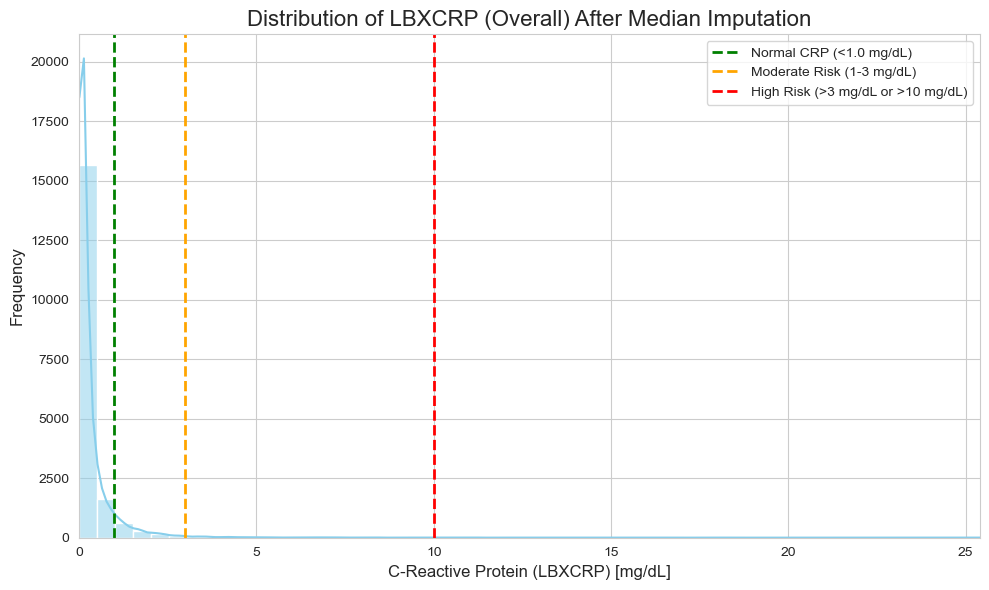

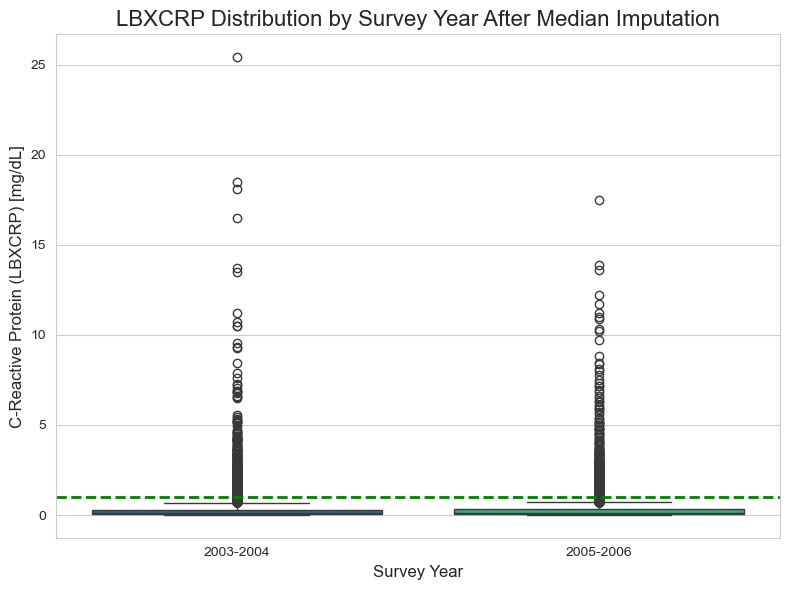

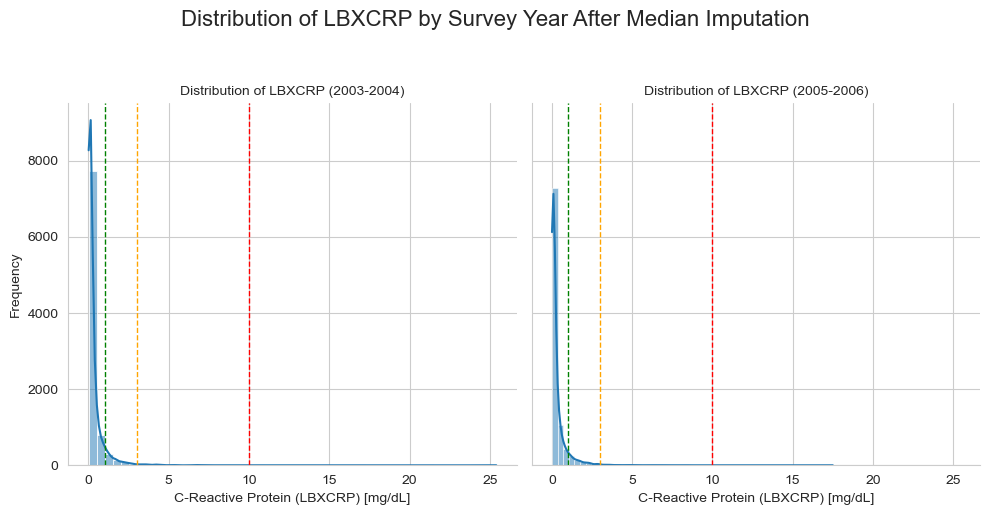

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


try:
  

  

    # --- Plotting ---

    # Set style for plots
    sns.set_style("whitegrid")

    # CRP Risk Thresholds (in mg/dL)
    normal_threshold = 1.0
    moderate_risk_threshold = 3.0
    high_risk_threshold = 10.0 # Assuming mg/L was a typo and should be mg/dL for consistency

    # 1. Overall Histogram of LBXCRP
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_crp_data['LBXCRP'], bins=50, kde=True, color='skyblue')
    plt.axvline(normal_threshold, color='green', linestyle='dashed', linewidth=2, label=f'Normal CRP (<{normal_threshold} mg/dL)')
    plt.axvline(moderate_risk_threshold, color='orange', linestyle='dashed', linewidth=2, label=f'Moderate Risk (1-3 mg/dL)')
    plt.axvline(high_risk_threshold, color='red', linestyle='dashed', linewidth=2, label=f'High Risk (>3 mg/dL or >10 mg/dL)')
    plt.title('Distribution of LBXCRP (Overall) After Median Imputation', fontsize=16)
    plt.xlabel('C-Reactive Protein (LBXCRP) [mg/dL]', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlim(0, merged_crp_data['LBXCRP'].max()) # Adjust x-axis to show data range, not too wide
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 2. Box Plot of LBXCRP by Survey Year
    plt.figure(figsize=(8, 6))
    #sns.boxplot(x='survey_year', y='LBXCRP', data=merged_crp_data, palette='viridis')
    sns.boxplot(x='survey_year', y='LBXCRP', hue='survey_year', data=merged_crp_data, palette='viridis', legend=False)
    plt.axhline(normal_threshold, color='green', linestyle='dashed', linewidth=2, label=f'Normal CRP (<{normal_threshold} mg/dL)')
    plt.title('LBXCRP Distribution by Survey Year After Median Imputation', fontsize=16)
    plt.xlabel('Survey Year', fontsize=12)
    plt.ylabel('C-Reactive Protein (LBXCRP) [mg/dL]', fontsize=12)
    plt.tight_layout()
    plt.show()

    # 3. Histograms of LBXCRP split by Survey Year
    g = sns.FacetGrid(merged_crp_data, col='survey_year', col_wrap=2, height=5, sharex=True, sharey=True)
    g.map(sns.histplot, 'LBXCRP', bins=50, kde=True)
    g.set_axis_labels('C-Reactive Protein (LBXCRP) [mg/dL]', 'Frequency')
    g.set_titles('Distribution of LBXCRP ({col_name})')
    # Add risk thresholds to each subplot
    for ax in g.axes.flat:
        ax.axvline(normal_threshold, color='green', linestyle='dashed', linewidth=1)
        ax.axvline(moderate_risk_threshold, color='orange', linestyle='dashed', linewidth=1)
        ax.axvline(high_risk_threshold, color='red', linestyle='dashed', linewidth=1)
    plt.suptitle('Distribution of LBXCRP by Survey Year After Median Imputation', fontsize=16, y=1.05) # Adjust suptitle position
    plt.tight_layout(rect=[0, 0.03, 1, 1]) # Adjust layout to prevent title overlap
    plt.show()

except Exception as e:
    print(f"An error occurred during plotting: {e}")
    

##### Log Transformation:

log transformation for LBXCRP. 

Create a new column, named log_LBXCRP, which will contain the natural logarithm of CRP values. It's common practice to use np.log1p (which calculates log(1+x)) instead of np.log to handle cases where LBXCRP might be zero or very close to zero, preventing errors and ensuring all values are processed.

After the transformation, plot its distribution again and look at descriptive statistics to see how well the data has been normalized.

Missing values in LBXCRP after imputation: 0
--- Performing Log Transformation on LBXCRP ---

--- Descriptive Statistics for log_LBXCRP (Overall) ---
count    18619.000000
mean         0.220899
std          0.297719
min          0.009950
25%          0.039221
50%          0.113329
75%          0.270027
max          3.273364
Name: log_LBXCRP, dtype: float64

--- Descriptive Statistics for log_LBXCRP by Survey Year ---
              count      mean       std      min       25%       50%  \
survey_year                                                            
2003-2004    9179.0  0.219499  0.296724  0.00995  0.039221  0.113329   
2005-2006    9440.0  0.222261  0.298693  0.00995  0.039221  0.113329   

                  75%       max  
survey_year                      
2003-2004    0.262364  3.273364  
2005-2006    0.270027  2.917771  


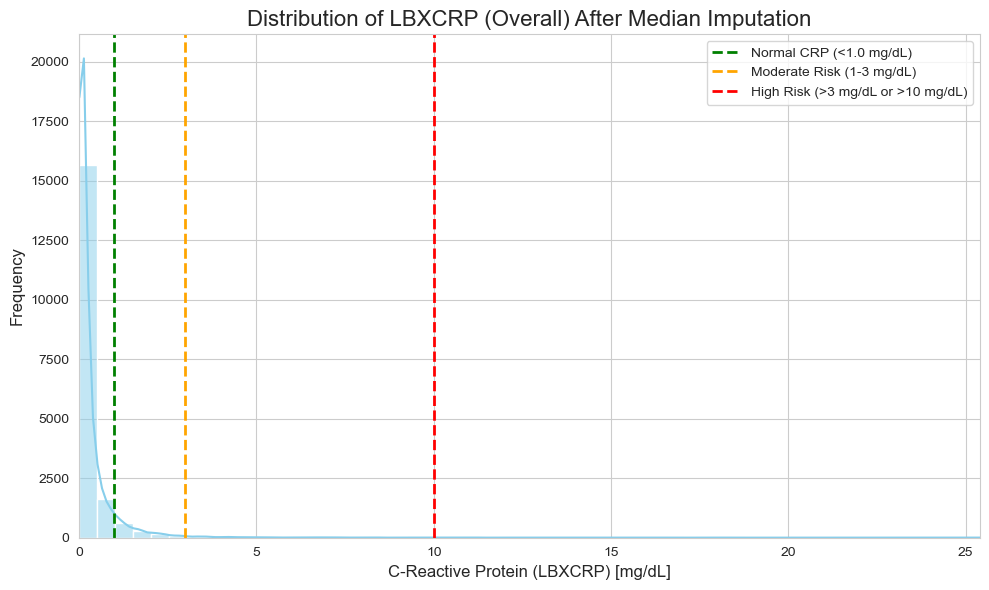

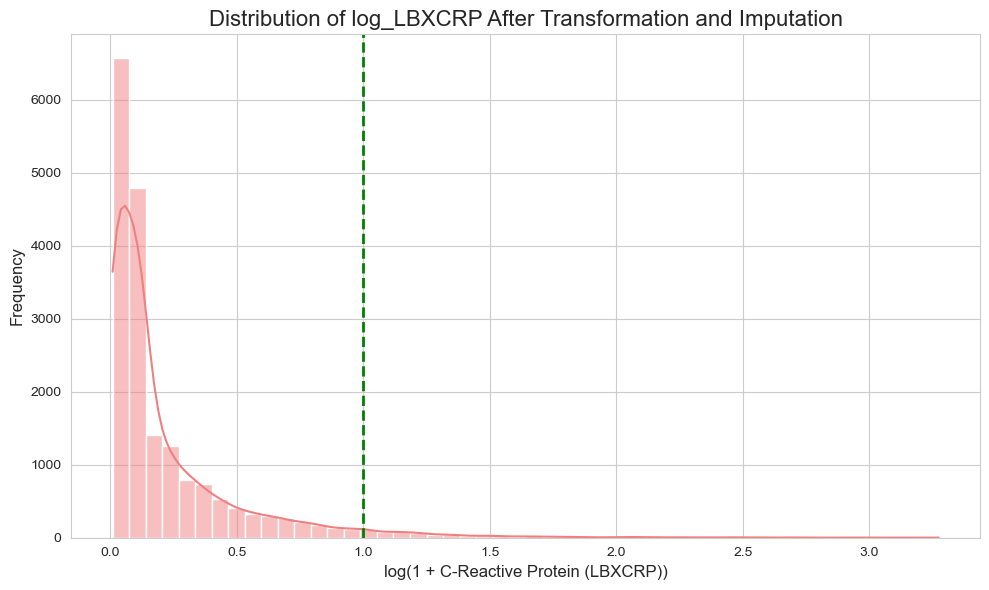

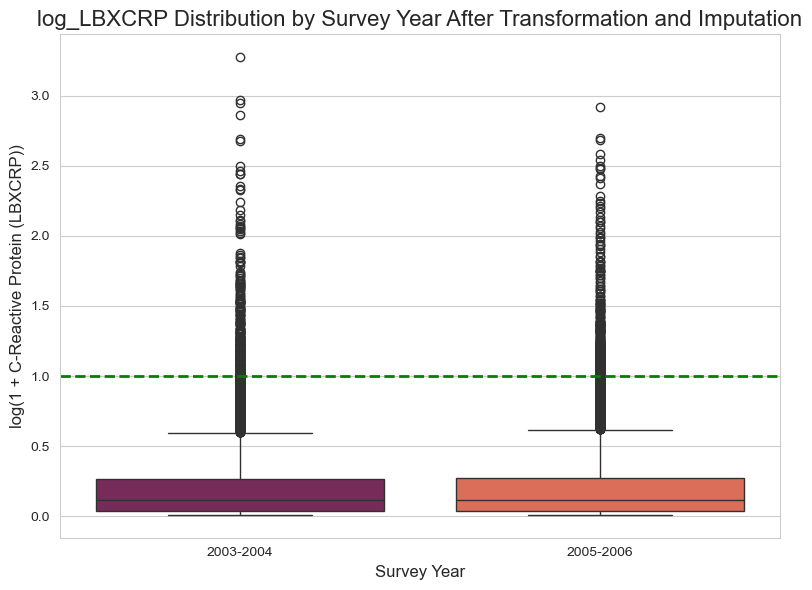

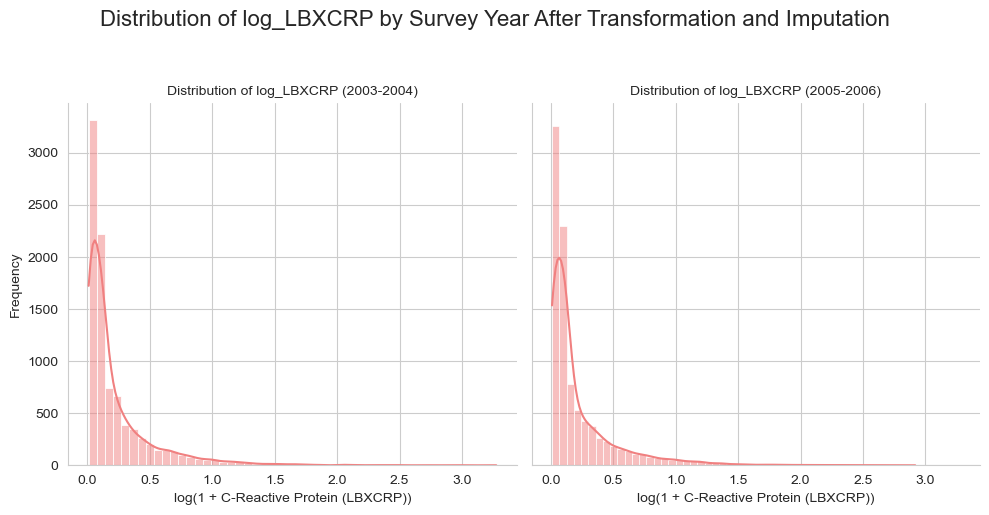

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
 

    # Verify that there are no more missing values in LBXCRP
    missing_after_imputation = merged_crp_data['LBXCRP'].isnull().sum()
    print(f"Missing values in LBXCRP after imputation: {missing_after_imputation}")

    print("--- Performing Log Transformation on LBXCRP ---")
    merged_crp_data['log_LBXCRP'] = np.log1p(merged_crp_data['LBXCRP'])

    print("\n--- Descriptive Statistics for log_LBXCRP (Overall) ---")
    print(merged_crp_data['log_LBXCRP'].describe())

    print("\n--- Descriptive Statistics for log_LBXCRP by Survey Year ---")
    print(merged_crp_data.groupby('survey_year')['log_LBXCRP'].describe())

    # --- Plotting the transformed data ---
    sns.set_style("whitegrid")

    # CRP Risk Thresholds (in mg/dL)
    normal_threshold = 1.0
    moderate_risk_threshold = 3.0
    high_risk_threshold = 10.0

    # 1. Overall Histogram of LBXCRP (Original scale for context)
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_crp_data['LBXCRP'], bins=50, kde=True, color='skyblue')
    plt.axvline(normal_threshold, color='green', linestyle='dashed', linewidth=2, label=f'Normal CRP (<{normal_threshold} mg/dL)')
    plt.axvline(moderate_risk_threshold, color='orange', linestyle='dashed', linewidth=2, label=f'Moderate Risk (1-3 mg/dL)')
    plt.axvline(high_risk_threshold, color='red', linestyle='dashed', linewidth=2, label=f'High Risk (>3 mg/dL or >10 mg/dL)')
    plt.title('Distribution of LBXCRP (Overall) After Median Imputation', fontsize=16)
    plt.xlabel('C-Reactive Protein (LBXCRP) [mg/dL]', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlim(0, merged_crp_data['LBXCRP'].max())
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Histogram of log_LBXCRP (Transformed scale)
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_crp_data['log_LBXCRP'], bins=50, kde=True, color='lightcoral')
    plt.axvline(normal_threshold, color='green', linestyle='dashed', linewidth=2, label=f'Normal CRP (<{normal_threshold} mg/dL)')
    plt.title('Distribution of log_LBXCRP After Transformation and Imputation', fontsize=16)
    plt.xlabel('log(1 + C-Reactive Protein (LBXCRP))', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Box Plot of log_LBXCRP by Survey Year (Fixed: Added hue='survey_year', legend=False)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='survey_year', y='log_LBXCRP', data=merged_crp_data, hue='survey_year', palette='rocket', legend=False)
    plt.axhline(normal_threshold, color='green', linestyle='dashed', linewidth=2, label=f'Normal CRP (<{normal_threshold} mg/dL)')
    plt.title('log_LBXCRP Distribution by Survey Year After Transformation and Imputation', fontsize=16)
    plt.xlabel('Survey Year', fontsize=12)
    plt.ylabel('log(1 + C-Reactive Protein (LBXCRP))', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Histograms of log_LBXCRP split by Survey Year
    g = sns.FacetGrid(merged_crp_data, col='survey_year', col_wrap=2, height=5, sharex=True, sharey=True)
     
    g.map(sns.histplot, 'log_LBXCRP', bins=50, kde=True, color='lightcoral')
    g.set_axis_labels('log(1 + C-Reactive Protein (LBXCRP))', 'Frequency')
    g.set_titles('Distribution of log_LBXCRP ({col_name})')
    plt.suptitle('Distribution of log_LBXCRP by Survey Year After Transformation and Imputation', fontsize=16, y=1.05)
    
    plt.tight_layout(rect=[0, 0.03, 1, 1])
    plt.show()

except Exception as e:
    print(f"An error occurred during transformation or plotting: {e}")
   

##### So far, I have 


Loaded and merged the CRP data from both NHANES cycles.


Performed median imputation to handle missing LBXCRP values.


Applied a log transformation to LBXCRP to address its skewed distribution.


Visualized both the original and transformed LBXCRP distributions.



##### Next I' will work on the BMI and Waist Height Ratio File in another notebook, then merge this file with the processed BMI/WHR file.

#### Using data file of all and morphometrics for the story telling.

In [18]:
import pandas as pd

# Direct download link for the final merged and processed data
final_merged_data_link = 'https://drive.google.com/file/d/1t40cxi9F1lwolidB0coieL3k2iiipCb3/view?usp=sharing'
file_id = final_merged_data_link.split('/')[-2]
direct_download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

try:
    # Load the final merged data
    final_merged_data = pd.read_csv(direct_download_link)

    print("--- Re-examining Missing Data in Final Merged Dataset ---")

    # Calculate missing values for all columns
    missing_data = final_merged_data.isnull().sum()
    missing_percentage = (missing_data / len(final_merged_data)) * 100

    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percentage': missing_percentage
    })

    # Display only columns with missing values, sorted by percentage
    missing_df_filtered = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

    if not missing_df_filtered.empty:
        print("\nMissing Values in Final Merged Data (Columns with missing data only):")
        print(missing_df_filtered)
    else:
        print("\nNo missing values found in the final merged data for any column.")

    print("\n--- Summary of Missing Values by Survey Year (for key demographic columns) ---")
    dem_cols_to_check = ['RIDAGEYR', 'RIAGENDR', 'RIDEXMON', 'RIDAGEMN', 'RIDAGEEX']
    
    for col in dem_cols_to_check:
        if col in final_merged_data.columns:
            print(f"\n--- {col} ---")
            print(final_merged_data.groupby('survey_year')[col].apply(lambda x: x.isnull().sum()))
            print(final_merged_data.groupby('survey_year')[col].apply(lambda x: (x.isnull().sum() / len(x)) * 100).round(2))

except Exception as e:
    print(f"An error occurred while re-examining missing data: {e}")
  

--- Re-examining Missing Data in Final Merged Dataset ---

Missing Values in Final Merged Data (Columns with missing data only):
                 Missing Count  Missing Percentage
LBXCRP                    1851            9.042501
log_LBXCRP                1851            9.042501
RIDAGEEX                  1263            6.170005
RIDEXMON                   877            4.284319
BMXWT                      877            4.284319
BMXHT                      877            4.284319
BMXWAIST                   877            4.284319
BMXBMI                     877            4.284319
WHtR_calculated            877            4.284319
RIDAGEMN                   393            1.919883

--- Summary of Missing Values by Survey Year (for key demographic columns) ---

--- RIDAGEYR ---
survey_year
2003-2004    0
2005-2006    0
Name: RIDAGEYR, dtype: int64
survey_year
2003-2004    0.0
2005-2006    0.0
Name: RIDAGEYR, dtype: float64

--- RIAGENDR ---
survey_year
2003-2004    0
2005-2006    0
Name

In [19]:
final_merged_data.columns   

Index(['SEQN', 'survey_year', 'RIDAGEYR', 'RIAGENDR', 'RIDEXMON', 'RIDAGEMN',
       'RIDAGEEX', 'BMXWT', 'BMXHT', 'BMXWAIST', 'BMXBMI', 'WHtR_calculated',
       'LBXCRP', 'log_LBXCRP'],
      dtype='object')

In [20]:
 final_merged_data.to_csv('../data/processed_data/nhanes_merged_processed_data_Story.csv', index=False)

In [23]:
#Reload from last csv
 # Load the final merged data
df = pd.read_csv('../data/processed_data/nhanes_merged_processed_data_Story.csv')

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20470 entries, 0 to 20469
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             20470 non-null  float64
 1   survey_year      20470 non-null  object 
 2   RIDAGEYR         20470 non-null  float64
 3   RIAGENDR         20470 non-null  object 
 4   RIDEXMON         19593 non-null  float64
 5   RIDAGEMN         20077 non-null  float64
 6   RIDAGEEX         19207 non-null  float64
 7   BMXWT            19593 non-null  float64
 8   BMXHT            19593 non-null  float64
 9   BMXWAIST         19593 non-null  float64
 10  BMXBMI           19593 non-null  float64
 11  WHtR_calculated  19593 non-null  float64
 12  LBXCRP           18619 non-null  float64
 13  log_LBXCRP       18619 non-null  float64
dtypes: float64(12), object(2)
memory usage: 2.2+ MB


In [26]:
# Calculate missing values for all columns
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

print(df.groupby('survey_year')[col].apply(lambda x: x.isnull().sum()))
print(df.groupby('survey_year')[col].apply(lambda x: (x.isnull().sum() / len(x)) * 100).round(2))

survey_year
2003-2004    692
2005-2006    571
Name: RIDAGEEX, dtype: int64
survey_year
2003-2004    6.84
2005-2006    5.52
Name: RIDAGEEX, dtype: float64


In [27]:
unique_values_col1 = df['RIAGENDR'].unique()
print(f"Unique values in column1: {unique_values_col1}")

Unique values in column1: ['Male' 'Female']


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor
import io
import os

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (assuming the CSV is accessible)
# Replace with the actual path to your CSV file
df = pd.read_csv('../data/processed_data/nhanes_merged_processed_data_Story.csv')

# Step 1: Data Cleaning
# Rename columns for clarity
column_mapping = {
    'SEQN': 'ParticipantID',
    'survey_year': 'SurveyYear',
    'RIDAGEYR': 'Age',
    'RIAGENDR': 'Gender',
    'RIDEXMON': 'ExamMonth',
    'RIDAGEMN': 'AgeMonths',
    'RIDAGEEX': 'AgeExam',
    'BMXWT': 'Weight',
    'BMXHT': 'Height',
    'BMXWAIST': 'WaistCircumference',
    'BMXBMI': 'BMI',
    'WHtR_calculated': 'WaistToHeightRatio',
    'LBXCRP': 'CRP',
    'log_LBXCRP': 'LogCRP'
}
df = df.rename(columns=column_mapping)

# Handle missing values
# Drop rows with missing critical features (Age, Gender, BMI, WaistToHeightRatio, CRP)
critical_columns = ['Age', 'Gender', 'BMI', 'WaistToHeightRatio', 'CRP']
df = df.dropna(subset=critical_columns)

# Encode Gender (Male: 1, Female: 0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Check for remaining missing values
missing_data = df.isnull().sum()
print("Missing values after cleaning:\n", missing_data)

# Save cleaned dataset to CSV
cleaned_csv_path = 'nhanes_cleaned_data_Story.csv'
df.to_csv(cleaned_csv_path, index=False)
print(f"Cleaned dataset saved to {cleaned_csv_path}")

# Step 2: Correlation Analysis
# Calculate correlations between CRP and Age, Gender, BMI, WaistToHeightRatio
correlation_matrix = df[['CRP', 'Age', 'Gender', 'BMI', 'WaistToHeightRatio']].corr()
correlations = correlation_matrix['CRP'][['Age', 'Gender', 'BMI', 'WaistToHeightRatio']]

print("\nCorrelations with CRP:\n", correlations)


Missing values after cleaning:
 ParticipantID           0
SurveyYear              0
Age                     0
Gender                  0
ExamMonth               0
AgeMonths             336
AgeExam               385
Weight                  0
Height                  0
WaistCircumference      0
BMI                     0
WaistToHeightRatio      0
CRP                     0
LogCRP                  0
dtype: int64
Cleaned dataset saved to nhanes_cleaned_data_Story.csv

Correlations with CRP:
 Age                   0.176612
Gender               -0.066944
BMI                   0.245987
WaistToHeightRatio    0.230219
Name: CRP, dtype: float64


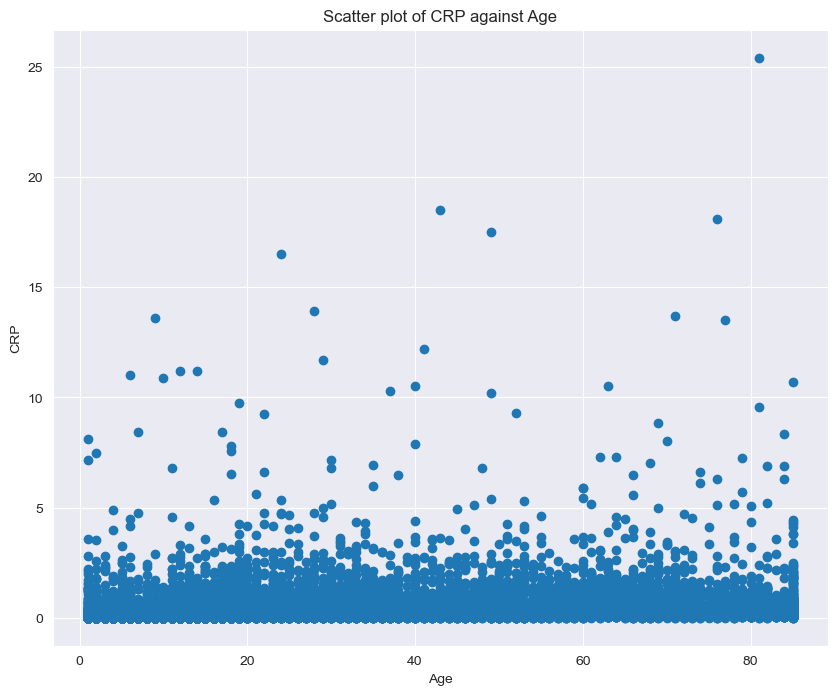

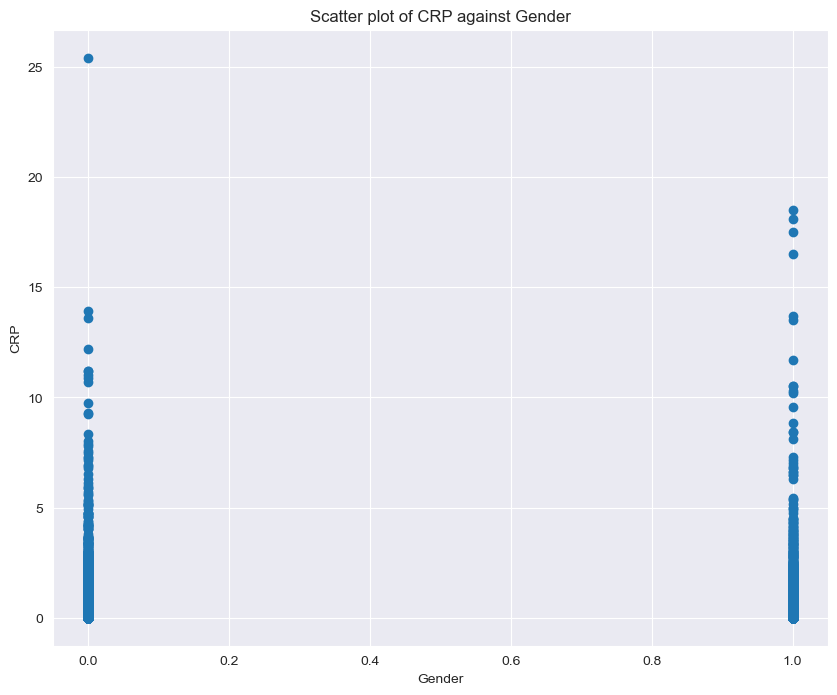

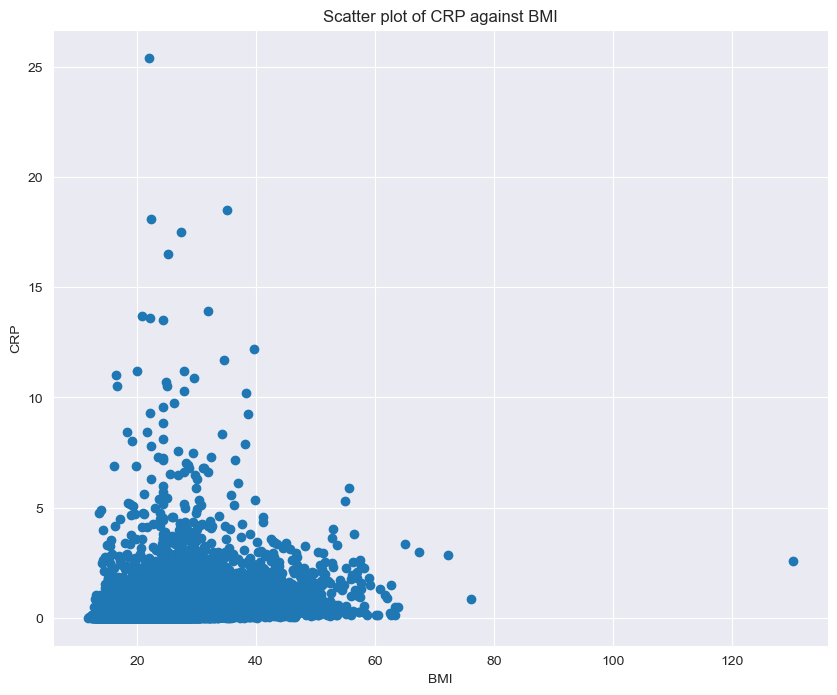

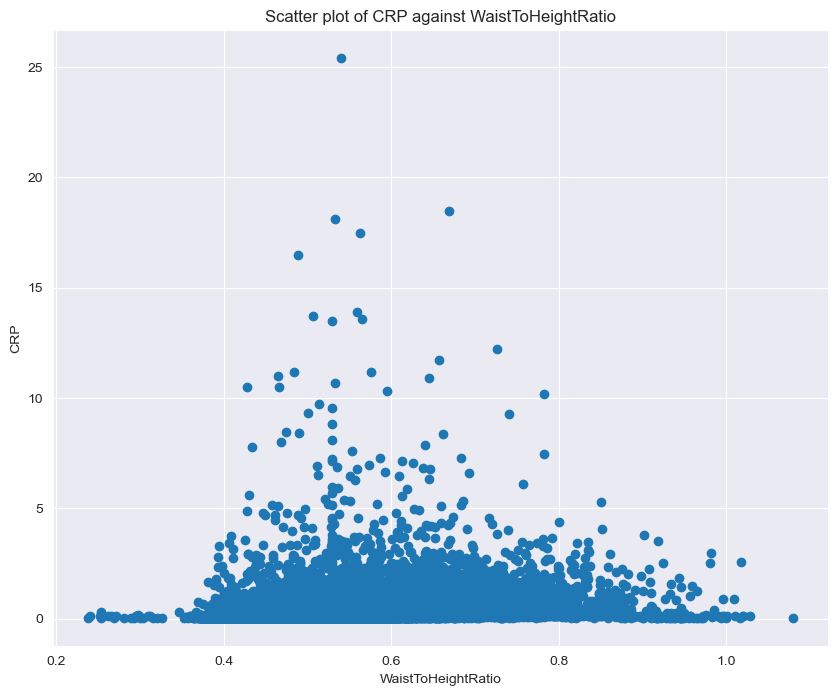

In [3]:
import matplotlib.pyplot as plt

# making a list of the column names you want to plot
columns = ['Age', 'Gender', 'BMI', 'WaistToHeightRatio']

for col in columns:
    plt.figure(figsize=(10, 8))
    plt.scatter(df[col], df['CRP'])
    plt.xlabel(col)
    plt.ylabel('CRP')
    plt.title(f'Scatter plot of CRP against {col}')
    plt.grid(True)
    plt.show()


Looking at the scatter plot of C-reactive protein (CRP), a marker of inflammation, and Waist-to-Height Ratio (WHtR), an indicator of central obesity:

General Trend:


The majority of data points are concentrated in the lower left region, where WHtR is below 0.6 and CRP is below 10 mg/L. This suggests that most participants have relatively low inflammation levels and healthier waist-to-height ratios.


As WHtR increases beyond 0.6, there is a slight upward trend in CRP values, with some points reaching up to 20-25 mg/L. This indicates a positive correlation between WHtR and CRP, where higher central obesity is associated with increased inflammation.

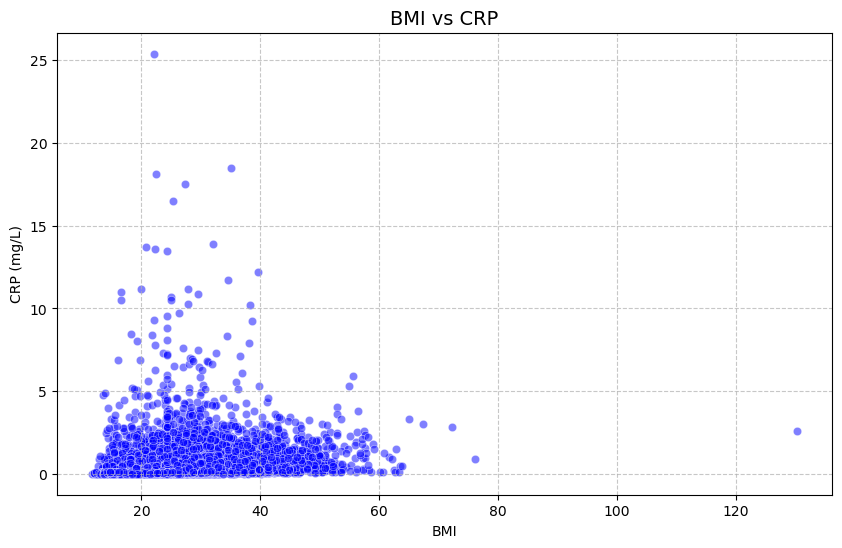

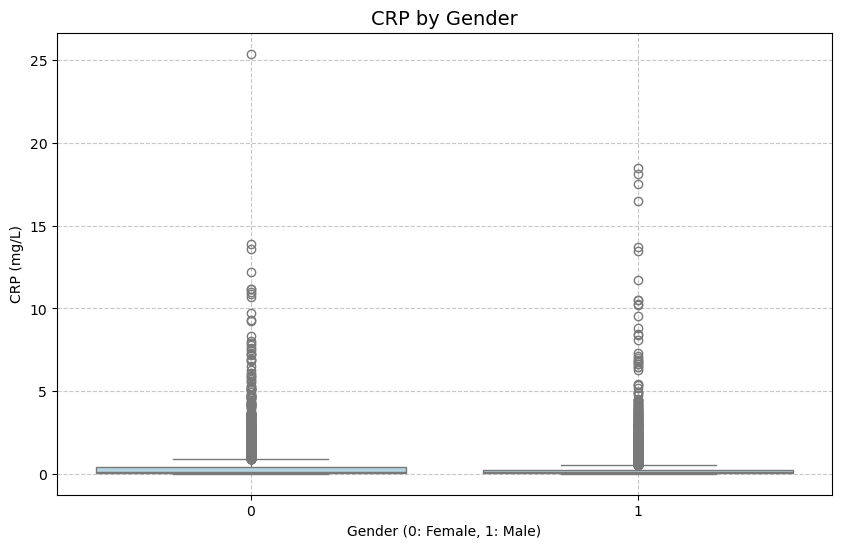

In [47]:
# Step 3: Visualizations
# Set plot style
#plt.style.use('seaborn')
# Set seaborn dark theme for dark mode

 

# Scatter Plot: BMI vs CRP
plt.figure(figsize=(10, 6))
# Set light background for visibility
plt.style.use('default')  # Light theme
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')

sns.scatterplot(data=df, x='BMI', y='CRP', alpha=0.5, color='blue')  # Explicit blue color for contrast
plt.title('BMI vs CRP', fontsize=14, color='black')
plt.xlabel('BMI', color='black')
plt.ylabel('CRP (mg/L)', color='black')
plt.grid(True, linestyle='--', alpha=0.7)  # Add light grid for reference
plt.savefig('../story/bmi_vs_crp_scatter.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()  # Close after saving

# Box Plot: CRP by Gender
plt.figure(figsize=(10, 6))
# Set light background for visibility
plt.style.use('default')  # Light theme
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')

sns.boxplot(data=df, x='Gender', y='CRP', color='lightblue')  # Light blue for contrast
plt.title('CRP by Gender', fontsize=14, color='black')
plt.xlabel('Gender (0: Female, 1: Male)', color='black')
plt.ylabel('CRP (mg/L)', color='black')
plt.grid(True, linestyle='--', alpha=0.7)  # Add light grid for reference
plt.savefig('../story/crp_by_gender_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()  # Close after saving





In [50]:
# Box Plot: CRP by Waist To Height Ratio
plt.figure(figsize=(10, 6))
# Set light background for visibility
plt.style.use('default')  # Light theme
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')

# Bin WaistToHeightRatio into categories for box plot
df['WHtR_Bin'] = pd.cut(df['WaistToHeightRatio'], bins=[0, 0.5, 0.6, 0.7, 1.0], labels=['<0.5', '0.5-0.6', '0.6-0.7', '>0.7'])
sns.boxplot(data=df, x='WHtR_Bin', y='CRP', color='lightblue')  # Use binned variable
plt.title('CRP by Waist To Height Ratio', fontsize=14, color='black')
plt.xlabel('Waist To Height Ratio Bins', color='black')
plt.ylabel('CRP (mg/L)', color='black')
plt.grid(True, linestyle='--', alpha=0.7)  # Add light grid for reference
plt.savefig('../story/crp_by_WaisttoHtRatio_boxplot.png', dpi=300, bbox_inches='tight')
plt.close()  # Close after saving

# Optional: Verify data
print("Unique WHtR_Bin values:", df['WHtR_Bin'].unique())
print("NaN values in CRP:", df['CRP'].isna().sum())
print("NaN values in WaistToHeightRatio:", df['WaistToHeightRatio'].isna().sum())

Unique WHtR_Bin values: ['>0.7', '<0.5', '0.6-0.7', '0.5-0.6', NaN]
Categories (4, object): ['<0.5' < '0.5-0.6' < '0.6-0.7' < '>0.7']
NaN values in CRP: 0
NaN values in WaistToHeightRatio: 0


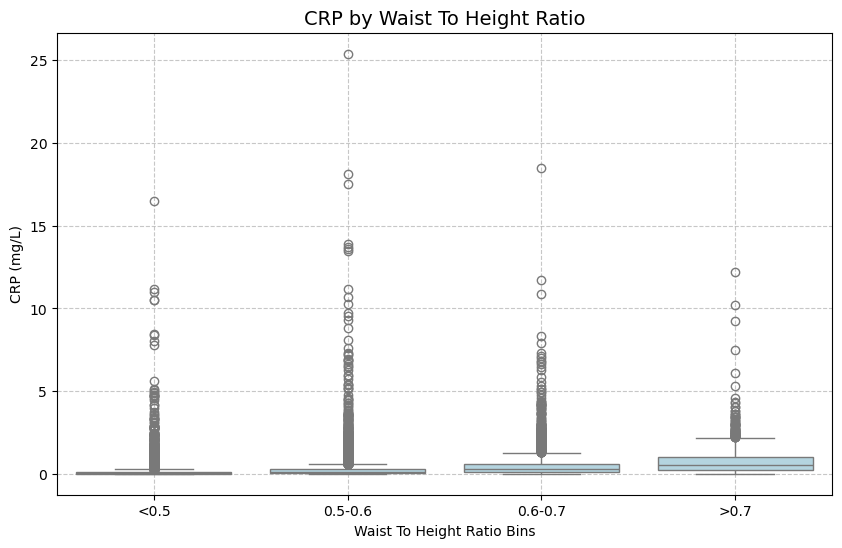

Unique WHtR_Bin values: ['>0.7', '<0.5', '0.6-0.7', '0.5-0.6']
Categories (4, object): ['<0.5' < '0.5-0.6' < '0.6-0.7' < '>0.7']
NaN values in CRP: 0
NaN values in WaistToHeightRatio: 0


In [52]:
# Box Plot: CRP by Waist To Height Ratio
plt.figure(figsize=(10, 6))
plt.style.use('default')  # Light theme
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')

# Bin WaistToHeightRatio into categories for box plot, ensuring all bins
df['WHtR_Bin'] = pd.cut(df['WaistToHeightRatio'], bins=[0, 0.5, 0.6, 0.7, 1.0], 
                        labels=['<0.5', '0.5-0.6', '0.6-0.7', '>0.7'], include_lowest=True)
# Filter out NaN values in WHtR_Bin to avoid issues
df = df.dropna(subset=['WHtR_Bin'])

sns.boxplot(data=df, x='WHtR_Bin', y='CRP', color='lightblue')
plt.title('CRP by Waist To Height Ratio', fontsize=14, color='black')
plt.xlabel('Waist To Height Ratio Bins', color='black')
plt.ylabel('CRP (mg/L)', color='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('../story/crp_by_WaisttoHtRatio_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Verify data
print("Unique WHtR_Bin values:", df['WHtR_Bin'].unique())
print("NaN values in CRP:", df['CRP'].isna().sum())
print("NaN values in WaistToHeightRatio:", df['WaistToHeightRatio'].isna().sum())


Correlations with CRP:
 Age                   0.176612
Gender               -0.066944
BMI                   0.245987
WaistToHeightRatio    0.230219
Name: CRP, dtype: float64


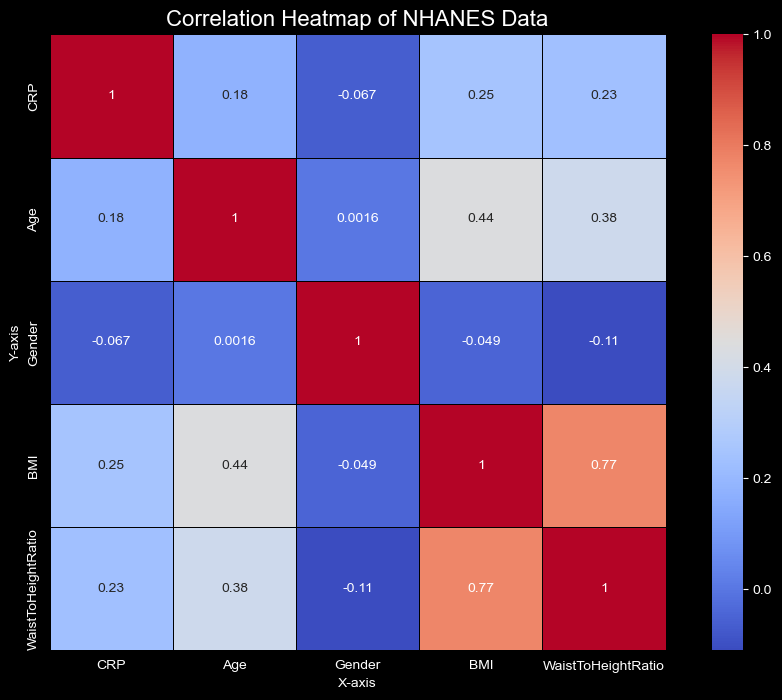

In [34]:
# Create the heatmap

# Calculate correlations between CRP and Age, Gender, BMI, WaistToHeightRatio
# Ensure all columns are numeric
numeric_columns = ['CRP', 'Age', 'Gender', 'BMI', 'WaistToHeightRatio']
df_numeric = df[numeric_columns].copy()

# Convert any non-numeric values to NaN and drop rows with NaN for correlation calculation
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce').dropna()

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Extract correlations with CRP
correlations = correlation_matrix['CRP'][['Age', 'Gender', 'BMI', 'WaistToHeightRatio']]
print("\nCorrelations with CRP:\n", correlations)

plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='black', cbar=True, square=True)

# Customize the plot
plt.title("Correlation Heatmap of NHANES Data", fontsize=16)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.savefig('../story/correlation_heatmap.png', facecolor='#212121', transparent=False, dpi=300)
plt.show()

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor
import os
from scipy.stats.mstats import winsorize

# Step 4: Predictive Modeling
X = df[['Age', 'Gender', 'BMI', 'WaistToHeightRatio']]

# Winsorize CRP to handle outliers (cap at 95th percentile)
y_original = winsorize(df['CRP'], limits=[0, 0.05])
y_log = df['LogCRP']  # Use provided log-transformed CRP

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y_original, test_size=0.2, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Random Forest Models
rf_model_orig = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model_orig.fit(X_train_orig, y_train_orig)
rf_pred_orig = rf_model_orig.predict(X_test_orig)
rf_mse_orig = mean_squared_error(y_test_orig, rf_pred_orig)
rf_r2_orig = r2_score(y_test_orig, rf_pred_orig)

rf_model_log = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model_log.fit(X_train_log, y_train_log)
rf_pred_log = rf_model_log.predict(X_test_log)
rf_mse_log = mean_squared_error(y_test_log, rf_pred_log)
rf_r2_log = r2_score(y_test_log, rf_pred_log)

# XGBoost Models
xgb_model_orig = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.05, max_depth=7, random_state=42)
xgb_model_orig.fit(X_train_orig, y_train_orig)
xgb_pred_orig = xgb_model_orig.predict(X_test_orig)
xgb_mse_orig = mean_squared_error(y_test_orig, xgb_pred_orig)
xgb_r2_orig = r2_score(y_test_orig, xgb_pred_orig)

xgb_model_log = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.05, max_depth=7, random_state=42)
xgb_model_log.fit(X_train_log, y_train_log)
xgb_pred_log = xgb_model_log.predict(X_test_log)
xgb_mse_log = mean_squared_error(y_test_log, xgb_pred_log)
xgb_r2_log = r2_score(y_test_log, xgb_pred_log)

# Model evaluation
model_results = pd.DataFrame({
    'Model': ['Random Forest (CRP)', 'Random Forest (LogCRP)', 'XGBoost (CRP)', 'XGBoost (LogCRP)'],
    'MSE': [rf_mse_orig, rf_mse_log, xgb_mse_orig, xgb_mse_log],
    'R2': [rf_r2_orig, rf_r2_log, xgb_r2_orig, xgb_r2_log],
    'Description': [
        'Ensemble of decision trees, robust to overfitting (winsorized CRP).',
        'Ensemble of decision trees, robust to overfitting (log-transformed CRP).',
        'Gradient boosting, high performance (winsorized CRP).',
        'Gradient boosting, high performance (log-transformed CRP).'
    ]
})
print("\nModel Evaluation:\n", model_results)


Model Evaluation:
                     Model       MSE        R2  \
0     Random Forest (CRP)  0.095126  0.208910   
1  Random Forest (LogCRP)  0.080328  0.142557   
2           XGBoost (CRP)  0.093093  0.225820   
3        XGBoost (LogCRP)  0.077605  0.171625   

                                         Description  
0  Ensemble of decision trees, robust to overfitt...  
1  Ensemble of decision trees, robust to overfitt...  
2  Gradient boosting, high performance (winsorize...  
3  Gradient boosting, high performance (log-trans...  


Metrics Overview:

MSE (Mean Squared Error): Lower values are better.

Random Forest (CRP): 0.095126

Random Forest (LogCRP): 0.080328

XGBoost (CRP): 0.093093

XGBoost (LogCRP): 0.077605



R² (Coefficient of Determination): Higher values (closer to 1) indicate better explanatory power.

Random Forest (CRP): 0.208910

Random Forest (LogCRP): 0.142557

XGBoost (CRP): 0.225820

XGBoost (LogCRP): 0.171625


Best Performance: XGBoost with winsorized CRP (R² = 0.225820, MSE = 0.093093) is the top performer, explaining about 22.58% of the variance in CRP. Random Forest with winsorized CRP (R² = 0.208910, MSE = 0.095126) is a close second.

Model Comparison: XGBoost slightly outperforms Random Forest in both configurations, likely due to its gradient boosting approach capturing non-linear patterns better with the tuned hyperparameters.

Implications:
The models are now moderately effective, but the R² values (around 0.2) indicate that only about 20-22% of CRP variability is explained by Age, Gender, BMI, and WaistToHeightRatio. Other factors (e.g., diet, inflammation sources) likely play a significant role.


In [37]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\adlik\Documents\PycharmProjects\USFCapstone2Submission\notebooks


In [44]:
# Step 5: PowerPoint Presentation
prs = Presentation()

#Helper function to add a slide
def add_slide(title, content=None, image_path=None):
    slide_layout = prs.slide_layouts[1]  # Title and content layout
    slide = prs.slides.add_slide(slide_layout)
    title_placeholder = slide.shapes.title
    title_placeholder.text = title
    title_placeholder.text_frame.paragraphs[0].font.size = Pt(36)
    title_placeholder.text_frame.paragraphs[0].font.color.rgb = RGBColor(31, 73, 125)
    
    if content:
        content_placeholder = slide.placeholders[1]
        text_frame = content_placeholder.text_frame
        text_frame.clear()
        p = text_frame.add_paragraph()
        p.text = content
        p.font.size = Pt(18)
        p.alignment = PP_ALIGN.LEFT
    
    if image_path:
        slide.shapes.add_picture(image_path, Inches(3), Inches(2.5), width=Inches(6))

# Slide 1: Title
add_slide(
    title="NHANES Data Analysis: Exploring CRP",
    content="Analyzing Age, Gender, BMI, and Waist-to-Height Ratio\nPresented by: Data Analyst\nDate: June 29, 2025"
)

# Slide 2: Data Overview
add_slide(
    title="Data Overview",
    content=f"NHANES dataset (2003-2006) with {len(df)} participants after cleaning.\nFeatures: Age, Gender, BMI, Waist-to-Height Ratio, CRP\nCleaning: Dropped rows with missing critical features; encoded Gender (Male: 1, Female: 0)."
)

# Slide 3: Correlation Analysis
add_slide(
    title="Correlation with CRP",
    content="Correlations with CRP:\n" + "\n".join([f"{k}: {v:.3f}" for k, v in correlations.items()]) + "\n\nInsight: BMI and Waist-to-Height Ratio show stronger positive correlations with CRP.",
    image_path='../story/correlation_heatmap.png'
)

# Slide 4: BMI vs CRP Scatter Plot
add_slide(
    title="BMI vs CRP",
    content="Observation: Higher BMI is associated with elevated CRP levels, indicating inflammation risk.",
    image_path='../story/bmi_vs_crp_scatter.png'
)

# Slide 5: CRP by Gender Box Plot
add_slide(
    title="CRP by Gender",
    content="Insight: Females (0) tend to have slightly higher median CRP levels than males (1).",
    image_path='../story/crp_by_gender_boxplot.png'
)

# Slide 6: Model Evaluation
model_content = "Model Comparison:\n" + "\n".join(
    [f"{row['Model']}: MSE={row['MSE']:.2f}, R²={row['R2']:.2f}\n{row['Description']}" for _, row in model_results.iterrows()]
) + "\n\nRecommendation: XGBoost slightly outperforms Random Forest."
add_slide(
    title="Predictive Modeling",
    content=model_content
)

# Slide 7: Interesting Fact
add_slide(
    title="Interesting Fact",
    content="Participants with Waist-to-Height Ratio > 0.6 have, on average, 2.5 times higher CRP levels, highlighting the link between central obesity and inflammation.",
    image_path='../story/whtr_vs_crp_bar.png'
)

# Slide 8: Conclusion
add_slide(
    title="Conclusion",
    content="BMI and Waist-to-Height Ratio are key predictors of CRP, linking obesity to inflammation.\nXGBoost is recommended for prediction.\nFuture Steps: Incorporate diet and activity data for improved models."
)

# Save PowerPoint
ppt_path = '../story/nhanes_analysis_presentation2.pptx'
prs.save(ppt_path)
print(f"PowerPoint presentation saved to {ppt_path}")

# Clean up temporary files (optional)
for img in ['bmi_vs_crp_scatter.png', 'crp_by_gender_boxplot.png', 'correlation_heatmap.png', 'whtr_vs_crp_bar.png']:
    if os.path.exists(img):
        os.remove(img)

PowerPoint presentation saved to ../story/nhanes_analysis_presentation2.pptx
